In [2]:
# Crear un ambiente virtual con python 3.8.10
# correr la siguiente línea de codigo instalara todos los modulos necesarios para ejecutar este notebook

In [3]:
#pip install -r requirements.txt

In [4]:
#Librerias para ML

#Manejo de la base de datos
import pandas as pd
import numpy as np

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split

#Evaluación del modelo
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
#from bayes_opt import BayesianOptimization
#from hyperopt import hp,fmin,tpe,Trials,space_eval

#Creación de modelo
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from skelm import ELMRegressor
#import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

import statsmodels.api as sm

#Para graficas
import matplotlib.pyplot as plt
import seaborn as sns

#Private functions
from own_functions import residuos
from own_functions import comparisson
from own_functions import scorer

#Guardando los modelos
import pickle

# 1. Cargando las BD

In [5]:
#Se crea un dataframe con los datos tratados
df_estandar = pd.read_csv('Train_prep_iter6.csv')

## 1.1 División de la base de datos en datos de entrada y salida

In [6]:
# Separamos de nuestros datos la variable de salida
output_name = ['load_shortfall_3h']

In [7]:
snow_3h = [x for x in df_estandar.columns if 'snow_3h' in x]
rain_3h = [x for x in df_estandar.columns if 'rain_3h' in x]
print(snow_3h,rain_3h)

['Bilbao_snow_3h', 'Valencia_snow_3h'] ['Seville_rain_3h', 'Barcelona_rain_3h']


In [8]:
clouds  = [x for x in df_estandar.columns if 'clouds_all' in x]
clouds.pop(0)
print(clouds)

['Seville_clouds_all', 'Madrid_clouds_all']


In [9]:
to_drop_1 = []
to_drop_1.extend(snow_3h)
to_drop_1.extend(rain_3h)

In [10]:
# Separación de las variables

#BD Estandarizada
x_est = df_estandar.drop(columns=to_drop_1).drop(columns = output_name)
y_est = df_estandar[output_name]

In [11]:
scaler_x = StandardScaler()
nombres = x_est.columns
x_est = scaler_x.fit_transform(x_est)
x_est = pd.DataFrame(x_est, columns = nombres)

scaler_y = StandardScaler()
nombres = y_est.columns
y_est = scaler_y.fit_transform(y_est)
y_est = pd.DataFrame(y_est, columns = nombres)

# 2. Datos de entrenamiento y prueba 

In [12]:
# División de los datos en train y test
#En este caso, el 80% de los datos se utilizarán para entrenar el modelo. 

#Para los datos estandarizados
X_train_est, X_test_est, y_train_est, y_test_est = train_test_split(
                                        x_est,
                                        y_est.values.reshape(-1,1),
                                        train_size   = 0.9,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [26]:
!pip show pickle

# 3. Cargando los mejores modelos

## 3.1 Random Forest

In [13]:
#load model from pickle file
with open('ML_models'+'\\'+'RF_tuned.pkl', 'rb') as file:  
    RF_tuned = pickle.load(file)

In [14]:
RF_tuned.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [15]:
RF_tuned.fit(X_train_est,y_train_est.ravel())

RandomForestRegressor(criterion='friedman_mse', max_features=None,
                      min_samples_leaf=2, n_estimators=50, n_jobs=-1)

## 3.2 Artificial Neural Network

In [ ]:
#load model from pickle file
with open('ML_models'+'\\'+'ANN_tuned.pkl', 'rb') as file:  
    ANN_tuned = pickle.load(file)

In [ ]:
ANN_tuned.get_params()

In [ ]:
ANN_tuned.fit(X_train_est,y_train_est.ravel())

## 3.3 Light Gradient Boosting Machine

In [16]:
#load model from pickle file
with open('ML_models'+'\\'+'LGBMR_tuned.pkl', 'rb') as file:  
    LGBMR_tuned = pickle.load(file)

In [17]:
LGBMR_tuned.get_params()

{'boosting_type': 'dart',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'gain',
 'learning_rate': 0.5,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 750,
 'n_jobs': -1,
 'num_leaves': 50,
 'objective': None,
 'random_state': 1234,
 'reg_alpha': 1e-06,
 'reg_lambda': 0.0001,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [18]:
LGBMR_tuned.fit(X_train_est,y_train_est.ravel())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6616
[LightGBM] [Info] Number of data points in the train set: 7668, number of used features: 62
[LightGBM] [Info] Start training from score -0.009794


LGBMRegressor(boosting_type='dart', importance_type='gain', learning_rate=0.5,
              n_estimators=750, n_jobs=-1, num_leaves=50, random_state=1234,
              reg_alpha=1e-06, reg_lambda=0.0001)

# 4. Evaluación

## 4.1 Metricas

In [19]:
results = {}

In [20]:
# Error de test del modelo Random Forest
y_test_RF                 = RF_tuned.predict(X_test_est)
results['Random Forest']  = scorer(scaler_y.inverse_transform(y_test_est),scaler_y.inverse_transform(y_test_RF.reshape(-1, 1)),'Random Forest')

In [245]:
# Error de test del modelo Extra Trees Regressor
y_test_ANN                       = ANN_tuned.predict(X_test_est)
results['Artificial Neural Network']  = scorer(scaler_y.inverse_transform(y_test_est),scaler_y.inverse_transform(y_test_ANN.reshape(-1, 1)),'Artificial Neural Network')

In [21]:
# Error de test del modelo Light Gradient Boosting Machine
y_test_LGBMR                                = LGBMR_tuned.predict(X_test_est)
results['Light Gradient Boosting Machine']  = scorer(scaler_y.inverse_transform(y_test_est),scaler_y.inverse_transform(y_test_LGBMR.reshape(-1, 1)),'Light Gradient Boosting Machine')

### 4.1.1 Resumen de resultados

In [22]:
df_results = pd.DataFrame(results).T.reset_index().rename(columns={"index": "model"})
df_results

,model,MSE,RMSE,MAE,MedAE,MAPE,R2
0,Random Forest,1.507685e+07,3882.891715,3020.642936,2390.468556,0.947270,0.394315
1,Light Gradient Boosting Machine,1.411323e+07,3756.757542,2918.897617,2409.260290,0.835166,0.433027


## 4.2 Graficas

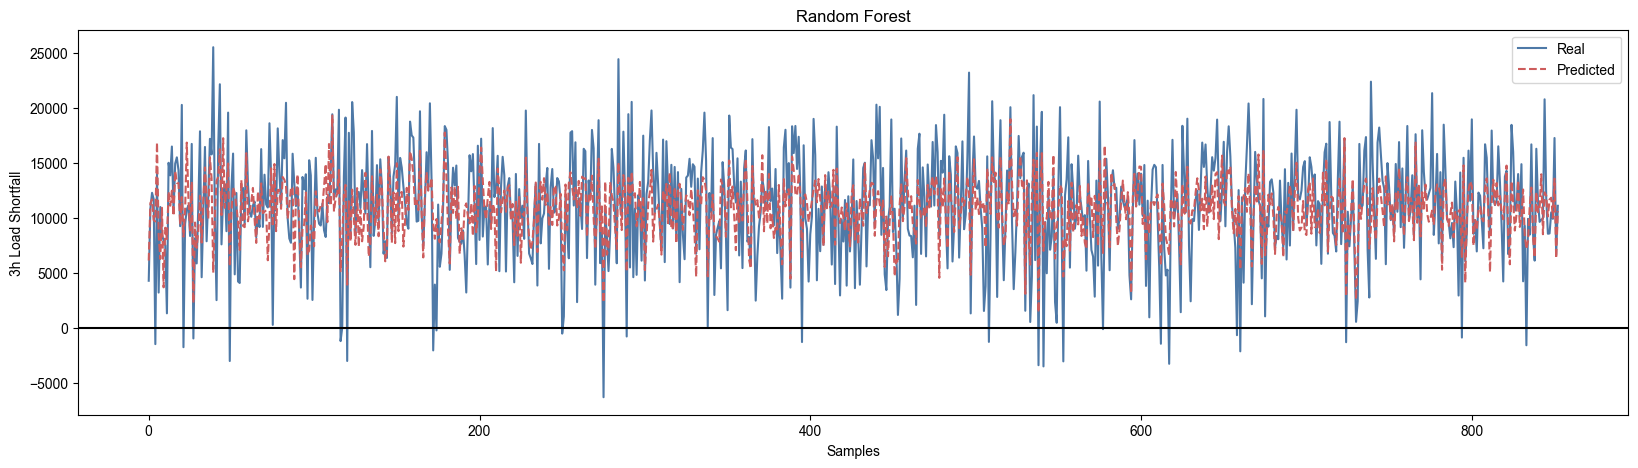

In [23]:
comparisson(scaler_y.inverse_transform(y_test_est), scaler_y.inverse_transform(y_test_RF.reshape(-1, 1)),'Random Forest')

In [ ]:
comparisson(scaler_y.inverse_transform(y_test_est), scaler_y.inverse_transform(y_test_ANN.reshape(-1, 1)),'Artificial Neural Network')

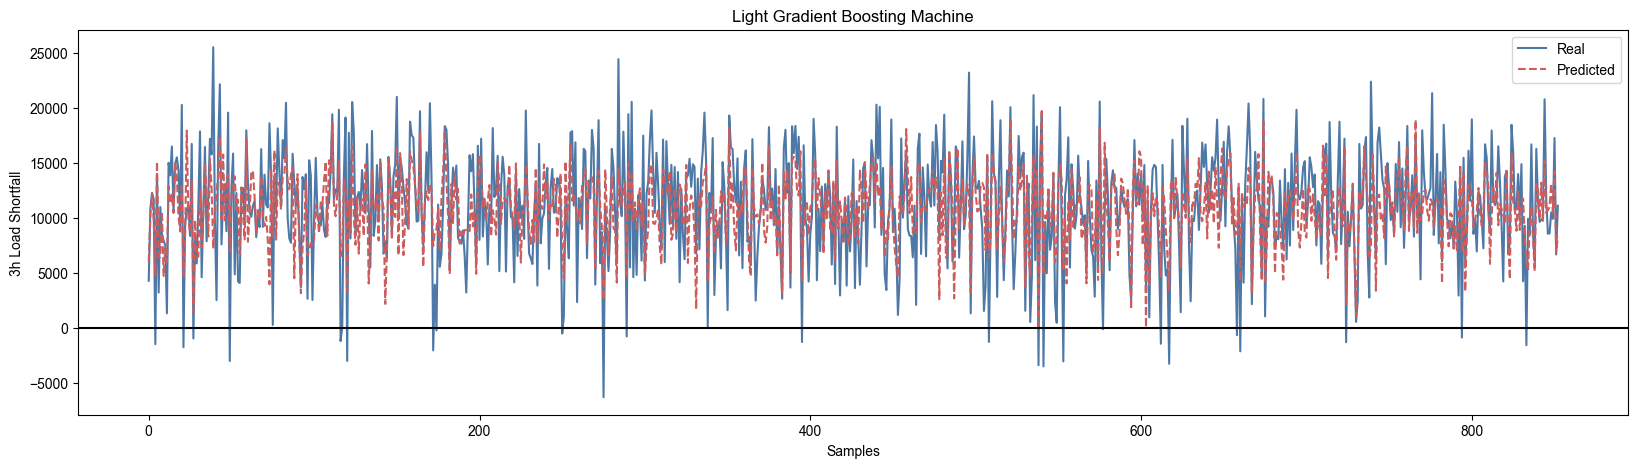

In [24]:
comparisson(scaler_y.inverse_transform(y_test_est), scaler_y.inverse_transform(y_test_LGBMR.reshape(-1, 1)),'Light Gradient Boosting Machine')

# 5. Evolución de las metricas

In [2]:
df_RMSE = pd.read_csv('all_time_RMSE.csv',delimiter=';')
df_RMSE

,Iteration,Linear Regressor,Random Forest,Support Vector Machine Regressor,Decision Trees,Extratrees Regressor,Gradient Boosting Machine,Light Gradient Boosting Machine,Extreme Learning Machine,Deep Neural Network
0,1,4889.0,4836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,4682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,4458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,4460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,4458,5029.0,5749.0,3915.0,4345.0,4067.0,4802.0,9591.0
5,6,NaN,4457,4197.0,5712.0,3937.0,4344.0,4063.0,4528.0,4658.0
6,7,NaN,4458,5005.0,5749.0,3915.0,4345.0,4067.0,4802.0,5013.0
7,8,NaN,3892,NaN,NaN,NaN,NaN,3757.0,NaN,3665.0


In [3]:
df_MAE = pd.read_csv('all_time_MAE.csv',delimiter=';')
df_MAE

,Iteration,Linear Regressor,Random Forest,Support Vector Machine Regressor,Decision Trees,Extratrees Regressor,Gradient Boosting Machine,Light Gradient Boosting Machine,Extreme Learning Machine,Deep Neural Network
0,1,3883.0,3836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,3745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,3551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,3553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,3552,4001.0,4371.0,3063.0,3438.0,3196.0,3836.0,8501.0
5,6,NaN,3551,3120.0,4365.0,3063.0,3437.0,3196.0,3564.0,3594.0
6,7,NaN,3552,3989.0,4371.0,3063.0,3438.0,3196.0,3713.0,4024.0
7,8,NaN,3034,NaN,NaN,304.0,NaN,2919.0,NaN,2686.0


### 5.5.2 Historico RMSE 

In [4]:
df_RMSE['RF Change per Iter'] = df_RMSE['Random Forest'].pct_change()*100
df_RMSE['ANN Change per Iter'] = df_RMSE['Deep Neural Network'].pct_change()*100
df_RMSE['LGBMR Change per Iter'] = df_RMSE['Light Gradient Boosting Machine'].pct_change()*100

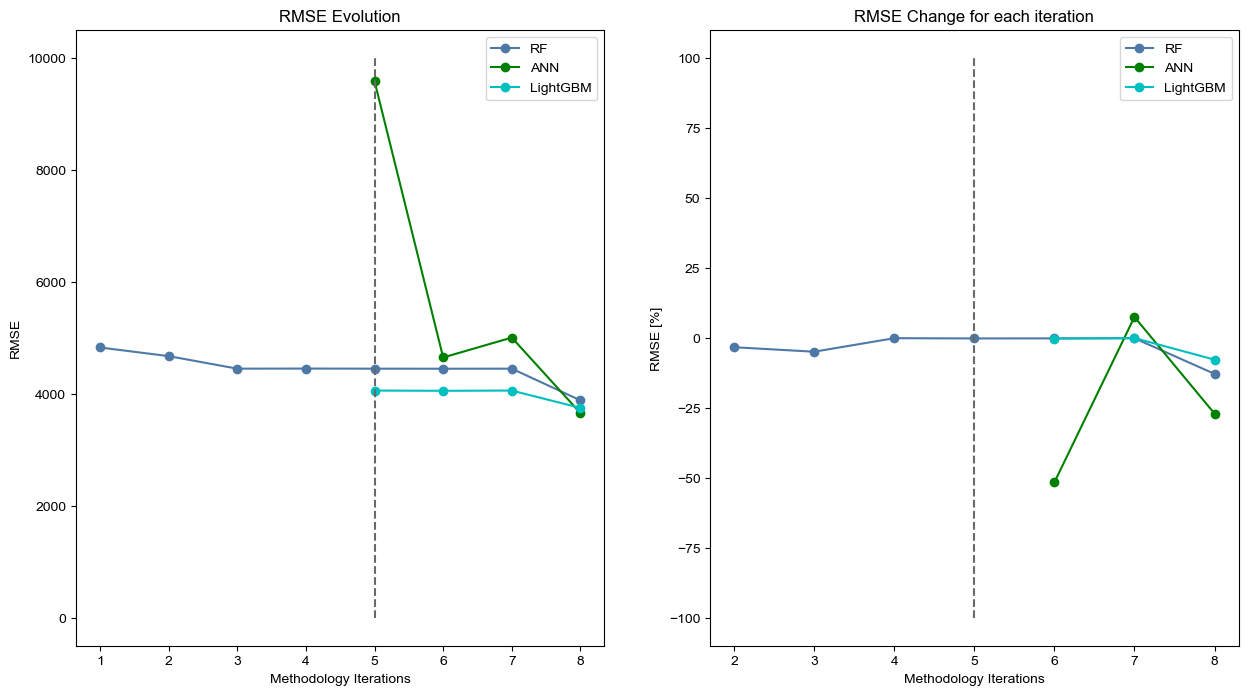

In [6]:
fig1, axs1 = plt.subplots(1, 2, figsize=(15, 8))

#RMSE Variation
axs1[0].plot(df_RMSE['Iteration'], df_RMSE['Random Forest'], color = '#4e79a7', marker= 'o', label='RF') 
axs1[0].plot(df_RMSE['Iteration'],df_RMSE['Deep Neural Network'], color = 'g', marker= 'o', label='ANN') 
axs1[0].plot(df_RMSE['Iteration'],df_RMSE['Light Gradient Boosting Machine'], color = 'c', marker= 'o', label='LightGBM')
axs1[0].vlines(5, 0, 10000, linestyle="dashed", colors='dimgray')
axs1[0].legend()
axs1[0].set_title('RMSE Evolution') # Titulo de la gráfica
axs1[0].set_xlabel('Methodology Iterations') # Etiqueta del eje x
axs1[0].set_ylabel('RMSE') # Etiqueta del eje y

#Percentage of change for each iteration
axs1[1].plot(df_RMSE['Iteration'], df_RMSE['RF Change per Iter'], color = '#4e79a7', marker= 'o', label='RF') 
axs1[1].plot(df_RMSE['Iteration'],df_RMSE['ANN Change per Iter'], color = 'g', marker= 'o', label='ANN') 
axs1[1].plot(df_RMSE['Iteration'],df_RMSE['LGBMR Change per Iter'], color = 'c', marker= 'o', label='LightGBM')
axs1[1].vlines(5, -100, 100, linestyle="dashed", colors='dimgray')
axs1[1].legend()
axs1[1].set_title('RMSE Change for each iteration') # Titulo de la gráfica
axs1[1].set_xlabel('Methodology Iterations') # Etiqueta del eje x
axs1[1].set_ylabel('RMSE [%]') # Etiqueta del eje y

plt.show()

In [8]:
df_MAE['RF Change per Iter'] = df_MAE['Random Forest'].pct_change()*100
df_MAE['ANN Change per Iter'] = df_MAE['Deep Neural Network'].pct_change()*100
df_MAE['LGBMR Change per Iter'] = df_MAE['Light Gradient Boosting Machine'].pct_change()*100

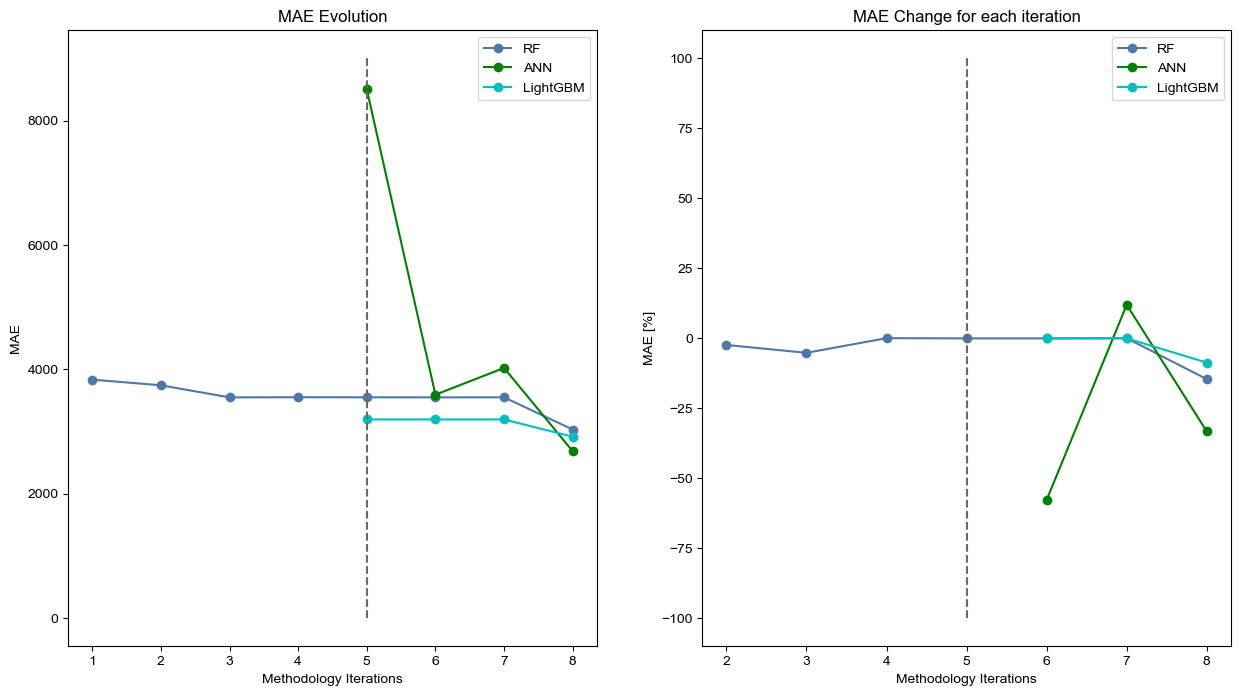

In [10]:
fig2, axs2 = plt.subplots(1, 2, figsize=(15, 8))

#RMSE Variation
axs2[0].plot(df_MAE['Iteration'], df_MAE['Random Forest'], color = '#4e79a7', marker= 'o', label='RF') 
axs2[0].plot(df_MAE['Iteration'],df_MAE['Deep Neural Network'], color = 'g', marker= 'o', label='ANN') 
axs2[0].plot(df_MAE['Iteration'],df_MAE['Light Gradient Boosting Machine'], color = 'c', marker= 'o', label='LightGBM')
axs2[0].vlines(5, 0, 9000, linestyle="dashed", colors='dimgray')
axs2[0].legend()
axs2[0].set_title('MAE Evolution') # Titulo de la gráfica
axs2[0].set_xlabel('Methodology Iterations') # Etiqueta del eje x
axs2[0].set_ylabel('MAE') # Etiqueta del eje y

#Percentage of change for each iteration
axs2[1].plot(df_MAE['Iteration'], df_MAE['RF Change per Iter'], color = '#4e79a7', marker= 'o', label='RF') 
axs2[1].plot(df_MAE['Iteration'],df_MAE['ANN Change per Iter'], color = 'g', marker= 'o', label='ANN') 
axs2[1].plot(df_MAE['Iteration'],df_MAE['LGBMR Change per Iter'], color = 'c', marker= 'o', label='LightGBM')
axs2[1].vlines(5, -100, 100, linestyle="dashed", colors='dimgray')
axs2[1].legend()
axs2[1].set_title('MAE Change for each iteration') # Titulo de la gráfica
axs2[1].set_xlabel('Methodology Iterations') # Etiqueta del eje x
axs2[1].set_ylabel('MAE [%]') # Etiqueta del eje y

plt.show()